<h1>Actividad Redes Neuronales Profundas</h1>

A01639224 | Fausto Alejandro Palma Cervantes

TC3007C.502 | Inteligencia artificial avanzada para la ciencia de datos II

4 de octubre de 2023


<h3> Posteriormente deberás crear un modelo de red neuronal profunda para poder clasificar las imágenes de la base de datos Fashion_mnist. </h3>

Importar módulos y librerías necesarias (TensorFlow, Keras y Matplotlib)


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Cargar y preparar el conjunto de datos Fashion MNIST

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Normalizar los valores de cada pixel en todas las imágenes

In [3]:
train_images, test_images = train_images/255.0, test_images/255

Definir las clases del conjunto de datos

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Visualizar las primeras veinticinco imágenes con su clase correspondiente

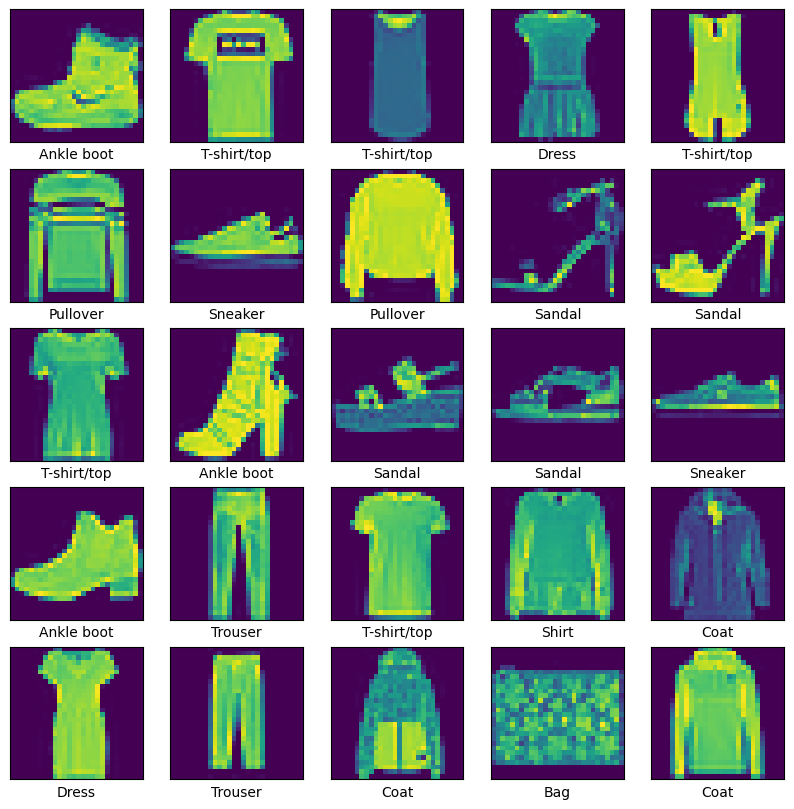

In [5]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Crear un modelo secuencial (por capas)

In [6]:
model = models.Sequential()

Añadir capas de convolución y de agrupación máxima

In [7]:
model.add(layers.Conv2D(28, (1,1), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(56, (1,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(56, (1,1), activation='relu'))

Añadir una capa de aplanamiento al modelo (conectar las capas de convolución con las densas)

In [8]:
model.add(layers.Flatten())

Añadir capas densas

In [9]:
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

Imprimir un resumen de la arquitectura del modelo

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        56        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 56)        1624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 56)          3192      
                                                                 
 flatten (Flatten)           (None, 2744)              0

Configurar el entrenamiento del modelo

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Iniciar el entrenamiento del modelo (y analizar su proceso de entrenamiento)

In [12]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 21s 5ms/step - loss: 0.5795 - accuracy: 0.7872 - val_loss: 0.4606 - val_accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4053 - accuracy: 0.8506 - val_loss: 0.3940 - val_accuracy: 0.8518
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3630 - accuracy: 0.8667 - val_loss: 0.3737 - val_accuracy: 0.8585
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3421 - accuracy: 0.8737 - val_loss: 0.3499 - val_accuracy: 0.8701
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3266 - accuracy: 0.8774 - val_loss: 0.3516 - val_accuracy: 0.8703
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3134 - accuracy: 0.8828 - val_loss: 0.3498 - val_accuracy: 0.8734
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3014 - accuracy: 0.8883 - val_loss: 0.3546 - val_accuracy: 0.8715

Visualizar el proceso de entrenamiento  del modelo

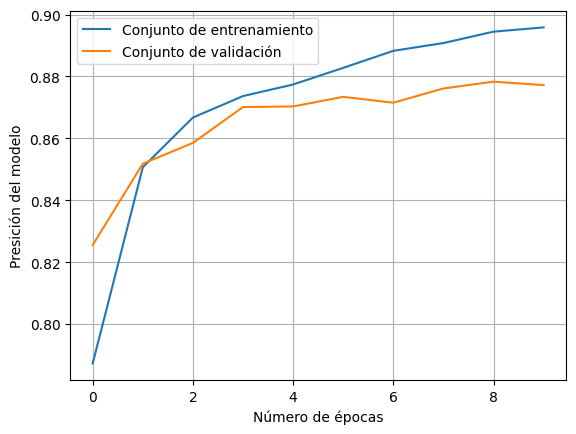

In [13]:
plt.plot(history.history['accuracy'], label='Conjunto de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Conjunto de validación')
plt.xlabel('Número de épocas')
plt.ylabel('Presición del modelo')
plt.legend()
plt.grid()